In [1]:
#Unsupervised Learning
#kmeans Algoritham
#Clustering
#Elbow method to find the exact number of clusters

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading DataSet
dataset=pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/Mall_Customers.csv")

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#dataset
#import feature
x=dataset.iloc[:,3:]
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


C:\Users\Satyam Meena\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


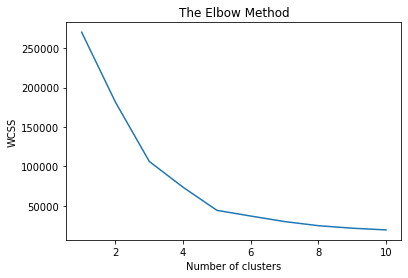

In [5]:
#Elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [7]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=34)

In [8]:
y_kmeans=kmeans.fit_predict(x)

In [9]:
y_kmeans

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1,
       2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 3, 1, 3, 4, 3, 4, 3,
       1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3])

In [10]:
test=kmeans.predict(np.asarray(([[15,39]])))

In [11]:
test[0]

2

In [12]:
import pickle 
filename='finalized_model.pickle'
pickle.dump(kmeans,open(filename,'wb'))

In [13]:
# Looking at the which belongs to C
x[y_kmeans==3]

,Annual Income (k$),Spending Score (1-100)
123,69,91
125,70,77
127,71,95
129,71,75
131,71,75
133,72,71
135,73,88
137,73,73
139,74,72
141,75,93


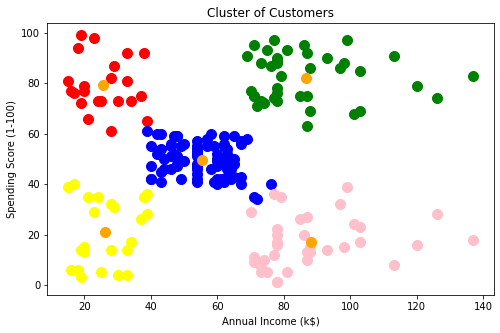

In [14]:
plt.figure(figsize=(8,5))
plt.scatter(x[y_kmeans==0]['Annual Income (k$)'],x[y_kmeans==0]['Spending Score (1-100)'],s=100,c='red',label = 'Centroids')
plt.scatter(x[y_kmeans==1]['Annual Income (k$)'],x[y_kmeans==1]['Spending Score (1-100)'],s=100,c='blue',label = 'Centroids')
plt.scatter(x[y_kmeans==2]['Annual Income (k$)'],x[y_kmeans==2]['Spending Score (1-100)'],s=100,c='yellow',label = 'Centroids')
plt.scatter(x[y_kmeans==3]['Annual Income (k$)'],x[y_kmeans==3]['Spending Score (1-100)'],s=100,c='green',label = 'Centroids')
plt.scatter(x[y_kmeans==4]['Annual Income (k$)'],x[y_kmeans==4]['Spending Score (1-100)'],s=100,c='pink',label = 'Centroids')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='orange',label='Centroids')
plt.title('Cluster of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()